In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from tensorflow.python.keras.models import Model
from sklearn.manifold import TSNE 
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import pickle

In [2]:
input_shape = (28, 28, 1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
x = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=2017)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((35000, 28, 28), (35000,), (35000, 28, 28), (35000,))

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [4]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu, use_bias=True)) 
model.add(Dropout(0.5)) 
model.add(Dense(70, activation=tf.nn.relu, use_bias=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(10,activation=tf.nn.softmax)) 

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x = X_train,y = y_train, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4732 - accuracy: 0.8582
Epoch 2/12
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2224 - accuracy: 0.9398
Epoch 3/12
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1737 - accuracy: 0.9515
Epoch 4/12
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1459 - accuracy: 0.9597
Epoch 5/12
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1341 - accuracy: 0.9628
Epoch 6/12
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1214 - accuracy: 0.9664
Epoch 7/12
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1155 - accuracy: 0.9671
Epoch 8/12
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1041 - accuracy: 0.9703
Epoch 9/12
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0949 - accuracy: 0.9727
Epoch 10/12
1875/1875 [==============================] - 20s 11m

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0724 - accuracy: 0.9818

Test accuracy: 0.9818000197410583


In [4]:
inputs = Input(shape=input_shape)
cnn = Conv2D(28, kernel_size=(3,3), input_shape = input_shape)(inputs)
cnn = Conv2D(64, kernel_size=(3,3))(cnn)
cnn = MaxPooling2D(pool_size=(2, 2))(cnn)
cnn = Flatten()(cnn) 
cnn = Dense(128, activation=tf.nn.relu, use_bias=True)(cnn) 
cnn = Dropout(0.5)(cnn) 
cnn = Dense(70, activation=tf.nn.relu, use_bias=True)(cnn)
cnn = Dropout(0.5)(cnn)
cnn = Flatten()(cnn)
outputs = Dense(10,activation=tf.nn.softmax)(cnn)

func_cnn = Model(inputs=inputs, outputs=outputs)

In [5]:
func_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
func_cnn.fit(x = X_train,y = y_train, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 89s 47ms/step - loss: 0.3855 - accuracy: 0.8872
Epoch 2/12
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1817 - accuracy: 0.9505
Epoch 3/12
1875/1875 [==============================] - 90s 48ms/step - loss: 0.1479 - accuracy: 0.9605
Epoch 4/12
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1288 - accuracy: 0.9655
Epoch 5/12
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1152 - accuracy: 0.9685
Epoch 6/12
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1063 - accuracy: 0.9718
Epoch 7/12
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1030 - accuracy: 0.9730
Epoch 8/12
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0931 - accuracy: 0.9750
Epoch 9/12
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0896 - accuracy: 0.9752
Epoch 10/12
1875/1875 [==============================] - 82s 44m

In [6]:
test_loss, test_acc = func_cnn.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0934 - accuracy: 0.9792

Test accuracy: 0.979200005531311


In [9]:
from keras.models import load_model 
func_cnn.save('functionalCNN')
loadcnn = load_model('functionalCNN')
loss, accuracy = loadcnn.evaluate(X_test, y_test)
loss, accuracy

INFO:tensorflow:Assets written to: functionalCNN\assets
313/313 [==============================] - 4s 12ms/step - loss: 0.0934 - accuracy: 0.9792


(0.09340804815292358, 0.979200005531311)

In [10]:
X_subset = X_train[0:30000]
y_subset = y_train[0:30000]
X_subset = X_subset.reshape(X_subset.shape[0], 784)
X_train_tsne = X_train.reshape(X_train.shape[0], 784)
X_subset.shape, y_subset.shape

((30000, 784), (30000,))

In [25]:
tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(X_train_tsne)

C:\Users\Владелец\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Владелец\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


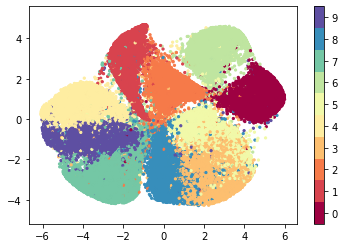

In [26]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

In [12]:
inputs = Input(shape=input_shape)
C1 = Conv2D(28, kernel_size=(3,3), input_shape = input_shape)(inputs)
P1 = MaxPooling2D(pool_size=(2, 2))(C1)
F1 = Flatten()(P1) 
L1 = Dense(128, activation=tf.nn.relu, use_bias=True)(F1) 
D1 = Dropout(0.5)(L1) 
L2 = Dense(70, activation=tf.nn.relu, use_bias=True)(D1)
D2 = Dropout(0.5)(L2)
F2 = Flatten()(D2)
L4 = Dense(10,activation=tf.nn.softmax)(F2)

In [13]:
model1 = Model(inputs=inputs, outputs=L4)

enc1 = Model(inputs=inputs, outputs=L1)
enc2 = Model(inputs=inputs, outputs=L2)
enc3 = Model(inputs=inputs, outputs=F2)

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
enc1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
enc2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
enc3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model1.fit(x=X_train, y=y_train, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4978 - accuracy: 0.8490
Epoch 2/12
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2362 - accuracy: 0.9361
Epoch 3/12
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1842 - accuracy: 0.9492
Epoch 4/12
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1523 - accuracy: 0.9577
Epoch 5/12
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1348 - accuracy: 0.9632
Epoch 6/12
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1216 - accuracy: 0.9664
Epoch 7/12
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1097 - accuracy: 0.9694
Epoch 8/12
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1050 - accuracy: 0.9706
Epoch 9/12
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0935 - accuracy: 0.9735
Epoch 10/12
1875/1875 [==============================] - 20s 11m

In [15]:
Pred1 = enc1.predict(X_test)
Pred2 = enc2.predict(X_test)

tsne1 = TSNE(n_components=2, init='pca', verbose=0, perplexity=40, n_iter=300, random_state=47)
Pred1_tsne = tsne1.fit_transform(Pred1)
Pred2_tsne = tsne1.fit_transform(Pred2)

C:\Users\Владелец\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Владелец\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Владелец\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Владелец\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [23]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0732 - accuracy: 0.9814

Test accuracy: 0.9814000129699707


In [28]:
Pred1.shape, Pred2.shape

((10000, 128), (10000, 70))

Text(0.5, 1.0, 'Layer 1')

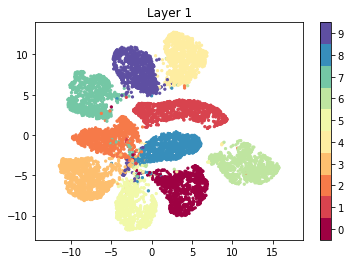

In [16]:
plt.scatter(Pred1_tsne[:, 0], Pred1_tsne[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Layer 1')

Text(0.5, 1.0, 'Layer 2')

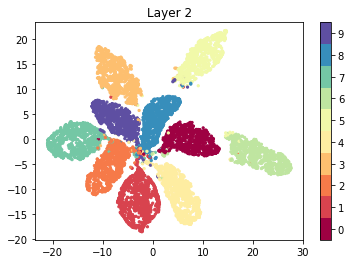

In [17]:
plt.scatter(Pred2_tsne[:, 0], Pred2_tsne[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Layer 2')

In [20]:
PredFl = enc3.predict(X_test)
PredFl_tsne = tsne1.fit_transform(PredFl)

C:\Users\Владелец\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Владелец\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Text(0.5, 1.0, 'Last Flatten layer')

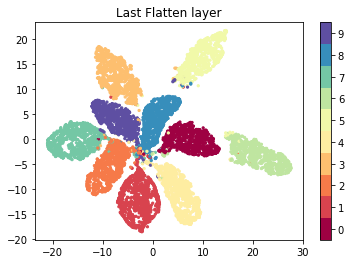

In [21]:
plt.scatter(PredFl_tsne[:, 0], PredFl_tsne[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Last Flatten layer')

In [40]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 70)                9030

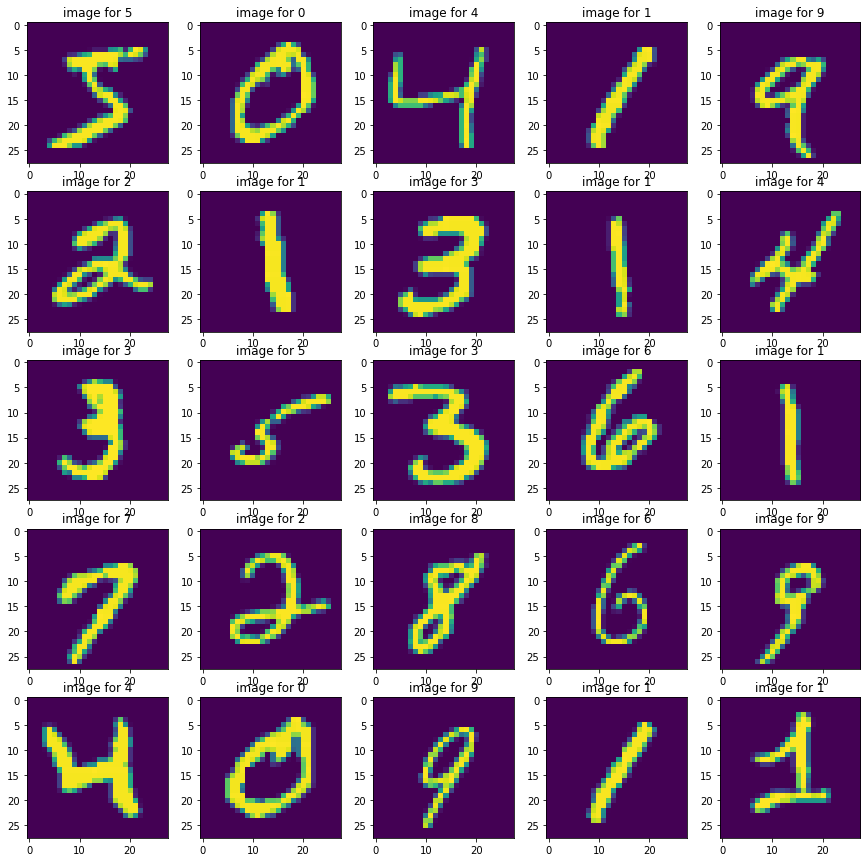

In [55]:
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
ind = 0 

for i in range(5):
    for j in range(5):
        ax[i, j].imshow(X_train[ind])
        ax[i, j].set_title(f'image for {y_train[ind]}')
        ind += 1 
    
    #test_img = X_train[i]
    #plt.imshow(test_img)
    #plt.show()

In [69]:
conv_outputs = [layer.output for layer in model1.layers[:2]]
conv_model = Model(inputs=model1.inputs, outputs=conv_outputs)
conv_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


3338 9


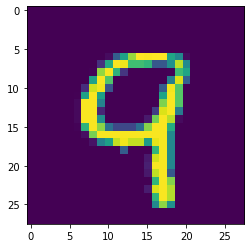

In [12]:
test_num = 9
rand_idx = np.random.choice(np.where(y_test==test_num)[0])
print(rand_idx, y_test[rand_idx]) 
plt.imshow(X_test[rand_idx])

In [154]:
func_cnn.summary()
conv = [layer.output for layer in func_cnn.layers[:3]] # last conv layer 
conv_model = Model(func_cnn.inputs, outputs=conv)
conv_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        16192     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0     

In [159]:
def GradCAM(img, model, last_conv, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv).output, model.output])
    #conv = [layer.output for layer in model.layers[:3]] # last conv layer 
    #grad_model = Model(model.inputs, outputs=conv)
    
    grad_model.summary()
    with tf.GradientTape() as tape: 
        conv, pred = grad_model(img)
        if pred_index is None: 
            pred_index = tf.argmax(pred[0])
        class_channel = pred[:, pred_index]
    
    grads = tape.gradient(class_channel, conv)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    conv = conv[0]
    heatmap = conv @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

4644 9


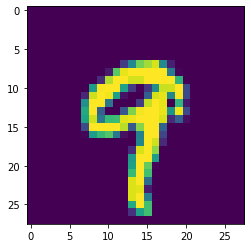

Model: "model_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        16192     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0 

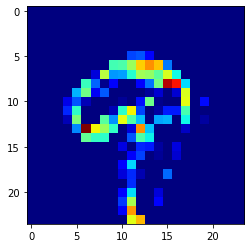

In [161]:
import matplotlib.cm as cm 
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display, Markdown
from PIL import Image

test_num = 9
rand_idx = np.random.choice(np.where(y_test==test_num)[0])
print(rand_idx, y_test[rand_idx]) 
plt.imshow(X_test[rand_idx])
plt.show()

img  = X_test[rand_idx]
img = np.expand_dims(img, axis=0)
heatmap = GradCAM(img, func_cnn, 'conv2d_1')
heatmap = np.uint8(255 * heatmap)

jet = cm.get_cmap('jet')
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
print(jet_heatmap.shape)
#jet_heamap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
#jet_heatmap = Image.fromarray(jet_heatmap)
#print(type(jet_heatmap))
#print(X_test[test_num].shape)
#jet_heatmap = jet_heatmap.resize((X_test[test_num].shape[0], X_test[test_num].shape[1]))
#jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
print(jet_heatmap.shape)

#viz = jet_heatmap * 0.4 + X_test[test_num] 

plt.imshow(jet_heatmap)
plt.show()